# Data Analysis of Anime using Jupyter notebooks and Python


Table of Contents:
* Obtaining a List
* Counting Unique Instances
* Adding Matplotlib
* Frequency of Anime Based on Genre
* Creating a Bar Chart with the Data Given

For this tutorial, you should have some understanding of Python and Pandas, as well as different libraries and how they work. Basic coding experience is necessary.

### Obtaining a List
In this tutorial we plan to find the number of anime by category using a public dataset retrieved from a [Kaggle](https://www.kaggle.com) competition.

First, we import the libraries that we're going to use.  One popular data analysis library for Python is [pandas](https://pandas.pydata.org/), as well as [matplotlib](https://matplotlib.org/), which is a data visualization library.
(Note: The percent sign behind the `matplotlib inline` is known as a [magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html) symbol, exclusive to Jupyter notebook.

In [2]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline     
import numpy as np
import seaborn as sns

   Next, we specify the dataframe `anime_df` in which we took the first 31 (don't forget 0 also includes as 1!) anime from this [dataset](https://www.kaggle.com/CooperUnion/anime-recommendations-database) and organized it in a table from highest rating to lowest. The table below shows all the columns taken from the first thirty-one rows of the original dataset. The point of writing the whole table out was to give a rough estimate of what the numbers should turn out to be, more or less, and if the output will seem reasonable.

In [3]:
anime_df = pd.read_csv('anime.csv')
#print(anime)
#print(initials)
anime_df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


The `apply` method scans through each row, locates the `name` column, and extracts the first letter of the string. The `.print()` function isn't needed to print `anime_df` because it's a dataframe. I shortened the full list to just 3 shows for convenience; a full table would take up a lot of unnecessary space. However, if you want to see the full list, simply delete the `.head(3)`. What that method does is it selects the first n amount of things you tell it to, and displays only that. For example, if you were to change the 3 to a 5 or a 6, more and more of the list would show. 

In [4]:
initials = anime_df.apply(lambda my_current_row: my_current_row['name'][:1], axis=1)
anime_df["Initials"] = initials
#type(initials)
anime_df.head(3)

,anime_id,name,genre,type,episodes,rating,members,Initials
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,K
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,F
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,G


### Counting Unique Instances
As a quick side project, it might be intriguing to know what initial was most commonly used in the top rated anime titles, so we can use the code below to derive a list from our previous table. I rewrote two lines of the code from the previous cell into this one to keep the relevant code together. A new method we haven't seen before shows up in this cell, `.unique()`. What it does is it filters through all of the elements it's given from the input and returns only unique outputs, ridding any repetition from the original input.

In [5]:
initials = anime_df.apply(lambda my_current_row: my_current_row['name'][:1], axis=1)
anime_df["Initials"] = initials
#type(initials)
#anime_df
distinct = initials.unique()
#len(distinct)
print(distinct.size)

10


The `.groupby()` function is very useful when trying to place a value to its respective object. When we create the dataframe `count_anime_df`, we use the `Initials` as the objects and the `Initial Count` as the values. What the `.groupby()` function does is it takes from the total count and it matches each number to an initial according to `Initials`. The `.sum()` function adds up everything in the input. However, because of the previous `.groupby()`, the function itself runs several times, once for every distinct initials.

In [6]:
initial_count = anime_df.apply(lambda my_current_row: 1, axis=1)
anime_df["Initial Count"] = initial_count
count_anime_df = anime_df[['Initials', 'Initial Count']].groupby(['Initials']).sum()
#anime_df.groupby(['Initials']).sum()
#anime_df.columns
count_anime_df
#sort_anime_df = count_anime_df.sort_values(by = ['Initial Count'], ascending=False)
#sort_anime_df.head(3)   ###   top n results
#sort_anime_df.rank(axis=0, ascending=False)

,Initial Count
Initials,
C,4
F,1
G,7
H,4
K,2
M,5
O,2
R,1
S,4


### Adding Matplotlib
We use matplotlib for the first time in the following cell. Matplotlib, as well as numpy, are libraries, each serving different functions. [Matplotlib](https://matplotlib.org/) is a plotting library, and [numpy](https://docs.scipy.org/doc/numpy-1.13.0/user/whatisnumpy.html) is a library that provides objects and arrays. We use the `.groupby` from `count_anime_df` encountered in the previous cell to graph each number to its corresponding initial.

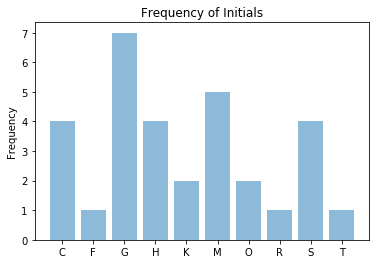

In [7]:
objs = count_anime_df.index
count_anime_df.columns
type(objs)
y_pos = np.arange(len(objs))
#y_pos
frequency = count_anime_df['Initial Count']

plt.title('Frequency of Initials')
plt.bar(y_pos, frequency, align='center', alpha=0.5)
plt.xticks(y_pos, objs)
plt.ylabel('Frequency')

plt.show()


### Frequency of Anime Based on Genre
First, the genres themselves must be separated in order for them to be counted individually. We can do this by selecting the `genre` column from each row and finding the comma in each list, isolating the elements from each other. The `split`method separates two pieces of the same string by whatever is in the single quotes in the parentheses. For example, in the cell below, in each `genre` section of the current column, the genres are split with a comma and a space.

In [8]:
genre_list = anime_df.apply(lambda my_current_row: my_current_row['genre'].split(', '), axis=1)
#type(genre_list) #genre_list is a list of lists
genre_list.head(3)

0               [Drama, Romance, School, Supernatural]
1    [Action, Adventure, Drama, Fantasy, Magic, Mil...
2    [Action, Comedy, Historical, Parody, Samurai, ...
dtype: object

We combine all of the elements together by [flattening](https://softwareengineering.stackexchange.com/questions/70743/what-does-flatten-mean) the list, and obtain the number of elements in the new list.

In [9]:
flattened_genre_list = [ g  for inner_list in genre_list   for g in inner_list ] #flattening a list of lists
#flattened_genre_list[:10]
len(flattened_genre_list)

164

In [10]:
listof_1 = [1 for x in flattened_genre_list]
#len(listof_1)


In [11]:
freq_dict = {'genre': flattened_genre_list,
            'frequency': listof_1}
freq_df = pd.DataFrame(freq_dict)
#freq_df.head()
count_by_genre = freq_df.groupby(['genre']).sum()
count_by_genre.head()

,frequency
genre,
Action,14
Adventure,9
Comedy,14
Drama,14
Fantasy,7


### Creating a Bar Chart with the Data Given
We create `gs`, an index for `count_by_genre` in order to graph the numbers given to us from the initials, as well as `frequency` and `y_pos`. `np.arange` is a function that crafts numeric sequences and is [important to know](https://www.sharpsightlabs.com/blog/numpy-arange/), as it can be used in many circumstances. The second half of the cell plots where each piece of information belongs on the graph. For example, `plt.title` places the title at the top, depending on what is written in the parentheses. `plt.bar` adjusts the bars themselves, and `plt.xticks` places the genres at a certain distance between each other.

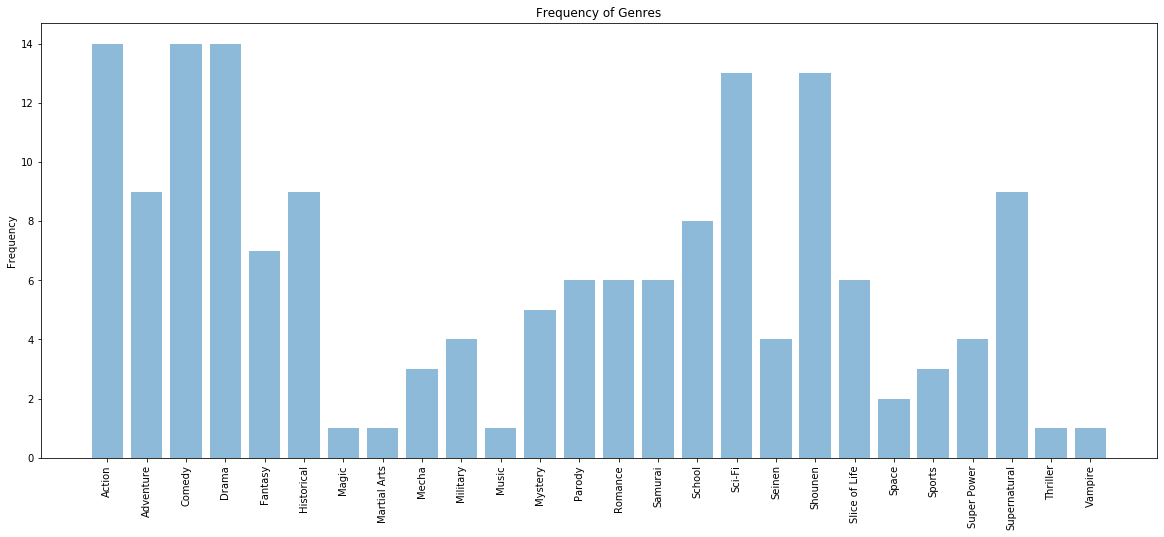

In [12]:
gs = count_by_genre.index
frequency = count_by_genre['frequency']
y_pos = np.arange(len(frequency))

fig = plt.figure(figsize=(20, 8))
plt.title('Frequency of Genres')
plt.bar(gs, frequency, align='center', alpha=0.5)
plt.xticks(gs, gs, rotation = 'vertical')
#plt.yticks(y_pos)
plt.ylabel('Frequency')

plt.show()

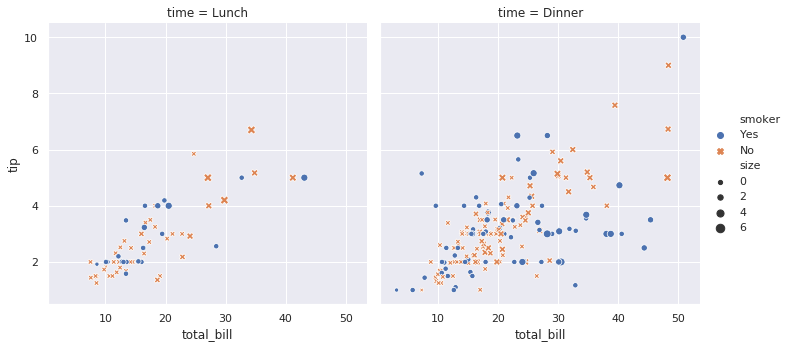

In [13]:
import seaborn as sns
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);